In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow
from keras.models import Sequentialuential
from keras.optimizers import Adam
from keras.layers import Dense

In [2]:
data = pd.read_csv('E:\\Datasets\\Auto-mpg_Dataset\\auto-mpg.csv')

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Data wrangling

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [120]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

### Cleaning the dataset by replacing the '?' values

In [31]:
print("Total number of NaN-equivalent values in each column: ")
for cols in range(data.shape[1]):
    print("Column - " + str(cols+1) + " ---> "+ str(((data[data.columns[cols]] == '?') | (data[data.columns[cols]] == ' ')).sum()), sep='\n')

Total number of NaN-equivalent values in each column: 
Column - 1 ---> 0
Column - 2 ---> 0
Column - 3 ---> 0
Column - 4 ---> 6
Column - 5 ---> 0
Column - 6 ---> 0
Column - 7 ---> 0
Column - 8 ---> 0
Column - 9 ---> 0


In [36]:
(data[data.columns[3]] == "?") # 4th column

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [38]:
data.duplicated().sum()

0

In [57]:
df = {
    'Col1' : [1,5,7,9], 'Col2' : [2,4,6,'?'], 'Col3' : [3,6,9,'>']
}
df = pd.DataFrame(df)
df

,Col1,Col2,Col3
0,1,2,3
1,5,4,6
2,7,6,9
3,9,?,>


In [58]:
df['Col2'].replace('?', 8, inplace=True)

In [59]:
df

,Col1,Col2,Col3
0,1,2,3
1,5,4,6
2,7,6,9
3,9,8,>


In [60]:
df.replace('>', 12, inplace=True)

In [61]:
df

,Col1,Col2,Col3
0,1,2,3
1,5,4,6
2,7,6,9
3,9,8,12


In [70]:
data1 = data[data['horsepower']!= '?']

In [76]:
data1['horsepower'].astype('float32')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float32

In [80]:
my_median = data1['horsepower'].median()

In [82]:
type(my_median)

numpy.float64

In [72]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [83]:
data_replaced = data.replace('?', my_median)

In [84]:
data_replaced

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [93]:
(data_replaced['horsepower'] == '?').value_counts()

False    398
Name: horsepower, dtype: int64

In [86]:
(data_replaced['horsepower'] == '?').sum()

0

In [91]:
(data['horsepower']=='?').value_counts()

False    392
True       6
Name: horsepower, dtype: int64

In [96]:
data_replaced['origin'].dtype

dtype('int64')

In [97]:
data_replaced.loc[data_replaced['origin'] == 1, 'origin'] = 'USA'
data_replaced.loc[data_replaced['origin'] == 2, 'origin'] = 'Europe'
data_replaced.loc[data_replaced['origin'] == 3, 'origin'] = 'Asia/Others'

In [109]:
data_replaced

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


In [115]:
data_cleaned = data_replaced.drop('car name', axis=1)

In [116]:
data_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA
394,44.0,4,97.0,52,2130,24.6,82,Europe
395,32.0,4,135.0,84,2295,11.6,82,USA
396,28.0,4,120.0,79,2625,18.6,82,USA


In [117]:
data_cleaned['origin'] = data_cleaned['origin'].astype('category')

In [118]:
data_cleaned['origin'].dtype

CategoricalDtype(categories=['Asia/Others', 'Europe', 'USA'], ordered=False)

In [114]:
data_cleaned

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: origin, Length: 398, dtype: category
Categories (3, object): ['Asia/Others', 'Europe', 'USA']

In [123]:
data_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA
394,44.0,4,97.0,52,2130,24.6,82,Europe
395,32.0,4,135.0,84,2295,11.6,82,USA
396,28.0,4,120.0,79,2625,18.6,82,USA


In [125]:
data_cleaned['horsepower'] = data_cleaned['horsepower'].astype('float32')
data_cleaned['cylinders'] = data_cleaned['cylinders'].astype('float32')
data_cleaned['weight'] = data_cleaned['weight'].astype('float32')
data_cleaned['model year'] = data_cleaned['model year'].astype('float32')

In [126]:
data_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,USA
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,Europe
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,USA
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,USA


### Splitting

In [127]:
X = data_cleaned.drop('mpg', axis=1)
y = pd.DataFrame(data_cleaned['mpg'])

In [128]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,USA
1,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,8.0,318.0,150.0,3436.0,11.0,70.0,USA
3,8.0,304.0,150.0,3433.0,12.0,70.0,USA
4,8.0,302.0,140.0,3449.0,10.5,70.0,USA
...,...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,82.0,USA
394,4.0,97.0,52.0,2130.0,24.6,82.0,Europe
395,4.0,135.0,84.0,2295.0,11.6,82.0,USA
396,4.0,120.0,79.0,2625.0,18.6,82.0,USA


In [129]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data_cleaned['origin'], test_size=0.2)

In [131]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
391,4.0,135.0,84.0,2370.0,13.0,82.0,USA
226,6.0,231.0,105.0,3425.0,16.9,77.0,USA
152,6.0,225.0,95.0,3264.0,16.0,75.0,USA
302,4.0,105.0,70.0,2150.0,14.9,79.0,USA
83,4.0,98.0,80.0,2164.0,15.0,72.0,USA
...,...,...,...,...,...,...,...
95,8.0,455.0,225.0,4951.0,11.0,73.0,USA
183,4.0,116.0,81.0,2220.0,16.9,76.0,Europe
176,6.0,232.0,90.0,3211.0,17.0,75.0,USA
341,6.0,173.0,110.0,2725.0,12.6,81.0,USA


In [132]:
y_train

,mpg
391,36.0
226,20.5
152,19.0
302,34.5
83,28.0
...,...
95,12.0
183,25.0
176,19.0
341,23.5


In [133]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
383,4.0,91.0,67.0,1965.0,15.0,82.0,Asia/Others
7,8.0,440.0,215.0,4312.0,8.5,70.0,USA
232,8.0,351.0,149.0,4335.0,14.5,77.0,USA
167,4.0,97.0,75.0,2171.0,16.0,75.0,Asia/Others
329,4.0,91.0,67.0,1850.0,13.8,80.0,Asia/Others
...,...,...,...,...,...,...,...
164,6.0,231.0,110.0,3039.0,15.0,75.0,USA
286,8.0,302.0,129.0,3725.0,13.4,79.0,USA
32,4.0,98.0,93.5,2046.0,19.0,71.0,USA
156,8.0,400.0,170.0,4668.0,11.5,75.0,USA


In [134]:
y_test

,mpg
383,38.0
7,14.0
232,16.0
167,29.0
329,44.6
...,...
164,21.0
286,17.6
32,25.0
156,16.0


In [137]:
X_train_encoded = pd.get_dummies(data=X_train, columns=['origin'])
X_test_encoded = pd.get_dummies(data=X_test, columns=['origin'])

In [138]:
X_train_encoded

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia/Others,origin_Europe,origin_USA
391,4.0,135.0,84.0,2370.0,13.0,82.0,0,0,1
226,6.0,231.0,105.0,3425.0,16.9,77.0,0,0,1
152,6.0,225.0,95.0,3264.0,16.0,75.0,0,0,1
302,4.0,105.0,70.0,2150.0,14.9,79.0,0,0,1
83,4.0,98.0,80.0,2164.0,15.0,72.0,0,0,1
...,...,...,...,...,...,...,...,...,...
95,8.0,455.0,225.0,4951.0,11.0,73.0,0,0,1
183,4.0,116.0,81.0,2220.0,16.9,76.0,0,1,0
176,6.0,232.0,90.0,3211.0,17.0,75.0,0,0,1
341,6.0,173.0,110.0,2725.0,12.6,81.0,0,0,1


In [139]:
X_test_encoded

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia/Others,origin_Europe,origin_USA
383,4.0,91.0,67.0,1965.0,15.0,82.0,1,0,0
7,8.0,440.0,215.0,4312.0,8.5,70.0,0,0,1
232,8.0,351.0,149.0,4335.0,14.5,77.0,0,0,1
167,4.0,97.0,75.0,2171.0,16.0,75.0,1,0,0
329,4.0,91.0,67.0,1850.0,13.8,80.0,1,0,0
...,...,...,...,...,...,...,...,...,...
164,6.0,231.0,110.0,3039.0,15.0,75.0,0,0,1
286,8.0,302.0,129.0,3725.0,13.4,79.0,0,0,1
32,4.0,98.0,93.5,2046.0,19.0,71.0,0,0,1
156,8.0,400.0,170.0,4668.0,11.5,75.0,0,0,1


In [142]:
X_train_encoded['origin_Asia/Others'] = X_train_encoded['origin_Asia/Others'].astype('float32')
X_train_encoded['origin_USA'] = X_train_encoded['origin_USA'].astype('float32')
X_train_encoded['origin_Europe'] = X_train_encoded['origin_Europe'].astype('float32')

In [144]:
X_train_scaled_std = X_train_encoded.copy()
X_test_scaled_std = X_test_encoded.copy()

X_train_scaled_minmax = X_train_encoded.copy()
X_test_scaled_minmax = X_test_encoded.copy()

In [145]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [146]:
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [147]:
minmax_scaler.fit(X_train_scaled_minmax.iloc[:, :6])
X_train_scaled_minmax.iloc[:, :6]=minmax_scaler.transform(X_train_scaled_minmax.iloc[:, :6])
X_test_scaled_minmax.iloc[:, :6]=minmax_scaler.transform(X_test_scaled_minmax.iloc[:, :6])

std_scaler.fit(X_train_scaled_std.iloc[:, :6])
X_train_scaled_std.iloc[:, :6]=std_scaler.transform(X_train_scaled_std.iloc[:, :6])
X_test_scaled_std.iloc[:, :6]=std_scaler.transform(X_test_scaled_std.iloc[:, :6])

In [148]:
X_train_scaled_minmax

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia/Others,origin_Europe,origin_USA
391,0.2,0.173127,0.206522,0.214630,0.276074,1.000000,0.0,0.0,1.0
226,0.6,0.421189,0.320652,0.513751,0.515337,0.583333,0.0,0.0,1.0
152,0.6,0.405685,0.266304,0.468103,0.460123,0.416667,0.0,0.0,1.0
302,0.2,0.095607,0.130435,0.152254,0.392638,0.750000,0.0,0.0,1.0
83,0.2,0.077519,0.184783,0.156223,0.398773,0.166667,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,1.0,1.000000,0.972826,0.946413,0.153374,0.250000,0.0,0.0,1.0
183,0.2,0.124031,0.190217,0.172101,0.515337,0.500000,0.0,1.0,0.0
176,0.6,0.423773,0.239130,0.453076,0.521472,0.416667,0.0,0.0,1.0
341,0.6,0.271318,0.347826,0.315282,0.251534,0.916667,0.0,0.0,1.0


In [149]:
X_train_scaled_std

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia/Others,origin_Europe,origin_USA
391,-0.852161,-0.560972,-0.531057,-0.708476,-0.959069,1.585994,0.0,0.0,1.0
226,0.331189,0.363299,0.013370,0.537464,0.467286,0.253156,0.0,0.0,1.0
152,0.331189,0.305532,-0.245881,0.347325,0.138127,-0.279980,0.0,0.0,1.0
302,-0.852161,-0.849807,-0.894008,-0.968293,-0.264178,0.786291,0.0,0.0,1.0
83,-0.852161,-0.917202,-0.634757,-0.951760,-0.227605,-1.079683,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,1.514540,2.519932,3.124382,2.339648,-1.690534,-0.813115,0.0,0.0,1.0
183,-0.852161,-0.743901,-0.608832,-0.885624,0.467286,-0.013412,0.0,1.0,0.0
176,0.331189,0.372927,-0.375506,0.284733,0.503859,-0.279980,0.0,0.0,1.0
341,0.331189,-0.195115,0.142996,-0.289226,-1.105362,1.319426,0.0,0.0,1.0


In [150]:
print(X_train_scaled_std.shape)
print(X_test_scaled_std.shape)
print(X_train_scaled_minmax.shape)
print(X_test_scaled_minmax.shape)

(318, 9)
(80, 9)
(318, 9)
(80, 9)


In [152]:
# For minmax scaled version
X_train_1= np.array(X_train_scaled_minmax)
X_test_1= np.array(X_test_scaled_minmax)

# For standard scaled version
X_train_2 = np.array(X_train_scaled_std)
X_test_2 = np.array(X_test_scaled_std)

### Establishing the ANN Architeecture

In [166]:
# For minmax scaled version
model1 = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
])

# For standard scaled version
model2 = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
])

In [167]:
# For minmax scaled version
model1.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')
history1 = model1.fit(X_train_1, y_train, validation_data=(X_test_1, y_test), epochs=42, verbose='auto')

Epoch 1/42
10/10 [==============================] - 1s 25ms/step - loss: 580.1896 - val_loss: 558.2985
Epoch 2/42
10/10 [==============================] - 0s 6ms/step - loss: 519.0006 - val_loss: 487.3487
Epoch 3/42
10/10 [==============================] - 0s 5ms/step - loss: 436.3383 - val_loss: 389.3329
Epoch 4/42
10/10 [==============================] - 0s 6ms/step - loss: 325.2852 - val_loss: 269.9108
Epoch 5/42
10/10 [==============================] - 0s 5ms/step - loss: 205.9129 - val_loss: 159.6714
Epoch 6/42
10/10 [==============================] - 0s 5ms/step - loss: 124.3871 - val_loss: 110.3274
Epoch 7/42
10/10 [==============================] - 0s 6ms/step - loss: 95.8216 - val_loss: 98.4477
Epoch 8/42
10/10 [==============================] - 0s 6ms/step - loss: 80.3407 - val_loss: 79.9241
Epoch 9/42
10/10 [==============================] - 0s 5ms/step - loss: 65.3093 - val_loss: 66.5821
Epoch 10/42
10/10 [==============================] - 0s 6ms/step - loss: 53.8154 - val_

In [168]:
# For standard scaled version
model2.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')
history2 = model2.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=42, verbose='auto')

Epoch 1/42
10/10 [==============================] - 1s 27ms/step - loss: 617.7740 - val_loss: 592.3104
Epoch 2/42
10/10 [==============================] - 0s 5ms/step - loss: 561.2755 - val_loss: 541.6514
Epoch 3/42
10/10 [==============================] - 0s 5ms/step - loss: 505.2898 - val_loss: 479.4923
Epoch 4/42
10/10 [==============================] - 0s 5ms/step - loss: 433.6291 - val_loss: 399.4073
Epoch 5/42
10/10 [==============================] - 0s 5ms/step - loss: 344.3719 - val_loss: 298.6833
Epoch 6/42
10/10 [==============================] - 0s 4ms/step - loss: 237.5604 - val_loss: 183.7691
Epoch 7/42
10/10 [==============================] - 0s 5ms/step - loss: 124.6811 - val_loss: 78.3168
Epoch 8/42
10/10 [==============================] - 0s 5ms/step - loss: 42.7703 - val_loss: 22.9924
Epoch 9/42
10/10 [==============================] - 0s 5ms/step - loss: 19.0330 - val_loss: 17.4300
Epoch 10/42
10/10 [==============================] - 0s 4ms/step - loss: 16.9780 - val

In [169]:
epochs = list(i for i in range(42))

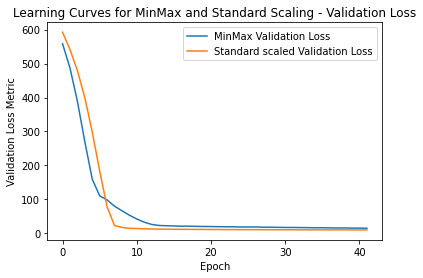

In [170]:
validation_loss_minmax = history1.history['val_loss']
validation_loss_std = history2.history['val_loss']

plt.plot(epochs, validation_loss_minmax, label='MinMax Validation Loss')
plt.plot(epochs, validation_loss_std, label='Standard scaled Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss Metric')
plt.title('Learning Curves for MinMax and Standard Scaling - Validation Loss')
plt.legend()
plt.show()

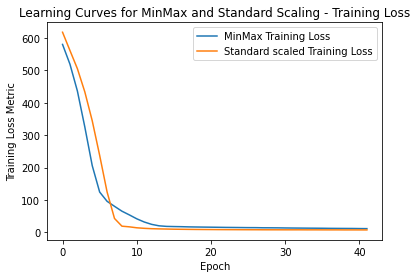

In [171]:
training_loss_minmax = history1.history['loss']
training_loss_std = history2.history['loss']

plt.plot(epochs, training_loss_minmax, label='MinMax Training Loss')
plt.plot(epochs, training_loss_std, label='Standard scaled Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss Metric')
plt.title('Learning Curves for MinMax and Standard Scaling - Training Loss')
plt.legend()
plt.show()

In [174]:
how_many_epochs = 42

In [177]:
# Let's go with the standard scaled version and train different models with different learning rates

In [175]:
my_optimizer = Adam(learning_rate=0.01)

In [178]:
m1 = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
])

m1.compile(optimizer = my_optimizer, loss='mean_squared_error')
h1 = m1.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=how_many_epochs, verbose='auto')

Epoch 1/42
10/10 [==============================] - 1s 26ms/step - loss: 244.3621 - val_loss: 47.8285
Epoch 2/42
10/10 [==============================] - 0s 6ms/step - loss: 46.8989 - val_loss: 24.9856
Epoch 3/42
10/10 [==============================] - 0s 6ms/step - loss: 20.6061 - val_loss: 14.0451
Epoch 4/42
10/10 [==============================] - 0s 6ms/step - loss: 11.6695 - val_loss: 11.4027
Epoch 5/42
10/10 [==============================] - 0s 5ms/step - loss: 9.4328 - val_loss: 11.1224
Epoch 6/42
10/10 [==============================] - 0s 5ms/step - loss: 7.9107 - val_loss: 11.6383
Epoch 7/42
10/10 [==============================] - 0s 5ms/step - loss: 8.0640 - val_loss: 10.5584
Epoch 8/42
10/10 [==============================] - 0s 5ms/step - loss: 7.5296 - val_loss: 10.0002
Epoch 9/42
10/10 [==============================] - 0s 5ms/step - loss: 7.1916 - val_loss: 10.5492
Epoch 10/42
10/10 [==============================] - 0s 6ms/step - loss: 7.1735 - val_loss: 9.6984
Epoc

In [179]:
m2 = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
])

In [180]:
my_optimizer_2 = Adam(learning_rate=0.1)
m2.compile(optimizer = my_optimizer_2, loss='mean_squared_error')
h2 = m2.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=how_many_epochs, verbose='auto')

Epoch 1/42
10/10 [==============================] - 1s 24ms/step - loss: 353.7922 - val_loss: 207.0000
Epoch 2/42
10/10 [==============================] - 0s 5ms/step - loss: 119.9475 - val_loss: 39.9712
Epoch 3/42
10/10 [==============================] - 0s 5ms/step - loss: 28.7291 - val_loss: 19.3482
Epoch 4/42
10/10 [==============================] - 0s 5ms/step - loss: 11.6043 - val_loss: 13.0907
Epoch 5/42
10/10 [==============================] - 0s 5ms/step - loss: 11.5469 - val_loss: 14.7754
Epoch 6/42
10/10 [==============================] - 0s 5ms/step - loss: 10.4063 - val_loss: 14.0530
Epoch 7/42
10/10 [==============================] - 0s 5ms/step - loss: 11.1518 - val_loss: 11.8582
Epoch 8/42
10/10 [==============================] - 0s 10ms/step - loss: 11.6220 - val_loss: 19.7699
Epoch 9/42
10/10 [==============================] - 0s 5ms/step - loss: 10.8595 - val_loss: 10.9358
Epoch 10/42
10/10 [==============================] - 0s 6ms/step - loss: 10.4358 - val_loss: 11

In [193]:
m3 = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
])

In [194]:
my_optimizer_3 = Adam(learning_rate=0.18)
m3.compile(optimizer = my_optimizer_3, loss='mean_squared_error')
h3 = m3.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=how_many_epochs, verbose='auto')

Epoch 1/42
10/10 [==============================] - 2s 33ms/step - loss: 9625.0303 - val_loss: 226.8596
Epoch 2/42
10/10 [==============================] - 0s 6ms/step - loss: 290.7993 - val_loss: 139.4501
Epoch 3/42
10/10 [==============================] - 0s 5ms/step - loss: 150.0388 - val_loss: 147.3532
Epoch 4/42
10/10 [==============================] - 0s 5ms/step - loss: 112.5705 - val_loss: 121.4241
Epoch 5/42
10/10 [==============================] - 0s 5ms/step - loss: 111.5952 - val_loss: 108.0003
Epoch 6/42
10/10 [==============================] - 0s 5ms/step - loss: 100.3023 - val_loss: 95.5528
Epoch 7/42
10/10 [==============================] - 0s 5ms/step - loss: 83.7967 - val_loss: 84.8514
Epoch 8/42
10/10 [==============================] - 0s 5ms/step - loss: 73.9756 - val_loss: 80.8826
Epoch 9/42
10/10 [==============================] - 0s 5ms/step - loss: 71.8296 - val_loss: 73.3151
Epoch 10/42
10/10 [==============================] - 0s 5ms/step - loss: 62.2765 - val_

In [183]:
m4 = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
])

In [184]:
my_optimizer_4 = Adam(learning_rate=0.25)
m4.compile(optimizer = my_optimizer_4, loss='mean_squared_error')
h4 = m4.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=how_many_epochs, verbose='auto')

Epoch 1/42
10/10 [==============================] - 1s 26ms/step - loss: 2082.5315 - val_loss: 804.7235
Epoch 2/42
10/10 [==============================] - 0s 5ms/step - loss: 608.8988 - val_loss: 344.1545
Epoch 3/42
10/10 [==============================] - 0s 6ms/step - loss: 155.1532 - val_loss: 86.4282
Epoch 4/42
10/10 [==============================] - 0s 6ms/step - loss: 71.5799 - val_loss: 80.7086
Epoch 5/42
10/10 [==============================] - 0s 5ms/step - loss: 63.0498 - val_loss: 71.0368
Epoch 6/42
10/10 [==============================] - 0s 4ms/step - loss: 56.4865 - val_loss: 60.2862
Epoch 7/42
10/10 [==============================] - 0s 5ms/step - loss: 59.0230 - val_loss: 55.6663
Epoch 8/42
10/10 [==============================] - 0s 4ms/step - loss: 52.6288 - val_loss: 69.1644
Epoch 9/42
10/10 [==============================] - 0s 5ms/step - loss: 55.7857 - val_loss: 70.7690
Epoch 10/42
10/10 [==============================] - 0s 5ms/step - loss: 62.7740 - val_loss: 

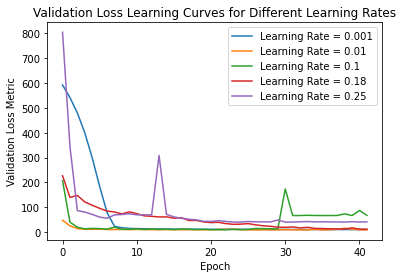

In [195]:
val_loss_0 = history2.history['val_loss']
val_loss_1 = h1.history['val_loss']
val_loss_2 = h2.history['val_loss']
val_loss_3 = h3.history['val_loss']
val_loss_4 = h4.history['val_loss']

plt.plot(epochs, val_loss_0, label='Learning Rate = 0.001')
plt.plot(epochs, val_loss_1, label='Learning Rate = 0.01')
plt.plot(epochs, val_loss_2, label='Learning Rate = 0.1')
plt.plot(epochs, val_loss_3, label='Learning Rate = 0.18')
plt.plot(epochs, val_loss_4, label='Learning Rate = 0.25')

plt.title('Validation Loss Learning Curves for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss Metric')

plt.legend()
plt.show()

In [196]:
# From the above visualizaton, it's clear that 0.01 and 0.18 are good learning rates...with 0.01 being the best!

In [226]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score

In [236]:
def baseline_model():
    m = Sequential([
    Dense(units=50, input_shape=(9,), activation='linear'),
    Dense(units=25, activation='elu'),
    Dense(units=16, activation='elu'),
    Dense(units=8, activation='elu'),
    Dense(units=4, activation='linear'),
    Dense(units=2, activation='linear'),
    Dense(units=1, activation='linear')
    ])
    
    m.compile(optimizer=my_optimizer, loss='mean_squared_error')
    return m

In [237]:
my_estimator = KerasRegressor(build_fn=baseline_model, nb_epoch= how_many_epochs)

C:\Users\mvsg2\AppData\Local\Temp\ipykernel_26496\1755685345.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_estimator = KerasRegressor(build_fn=baseline_model, nb_epoch= how_many_epochs)


In [238]:
kfold = KFold(n_splits=5)

In [ ]:
results = cross_val_score(estimator=my_estimator, X=X_train_2, y=y_train, cv=kfold, scoring='neg_mean_squared_error')

2/2 [==============================] - 0s 1ms/step


In [222]:
results

array([ -91.57188133,  -42.99743184, -305.98833061,  -64.63295209,
        -53.309603  ])

In [223]:
results.mean()

-111.70003977157964

In [224]:
results.std()

98.48643044091381